In [1]:
using HDF5, StatsBase, PyPlot
push!(LOAD_PATH, "../Preprocesamiento/")
using ArraySetTools, OrdenaSets

In [2]:
# El de franco que tiene bonito los canales detectados.
#arxname="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"

"/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"

In [2]:
arxname="/home/karel/BRWFiles/Isabel2019/Cacho_06_control_02_preproc.h5"

"/home/karel/BRWFiles/Isabel2019/Cacho_06_control_02_preproc.h5"

In [3]:
arx=h5open(arxname)
names(arx)

13-element Array{String,1}:
 "CanalesBuenos"
 "CanalesMalos" 
 "Chs"          
 "Factor"       
 "MaxVolt"      
 "MinVolt"      
 "NRecFrames"   
 "Offset"       
 "RawEncodedTOC"
 "SamplingRate" 
 "ValidChs"     
 "dset"         
 "notacacho"    

In [4]:
canales=read(arx["CanalesBuenos"])
lfp=read(arx["dset"]);
#lfp=read(arx["LFPSaturados"])
dd=size(lfp)
if length(dd)==2
    nmax=dd[2]
    lfp=reshape(lfp, 64,64,nmax)
end
nmax=size(lfp,3)
typeof(lfp)

Array{UInt16,3}

In [5]:
typeof(canales)

Array{UInt16,2}

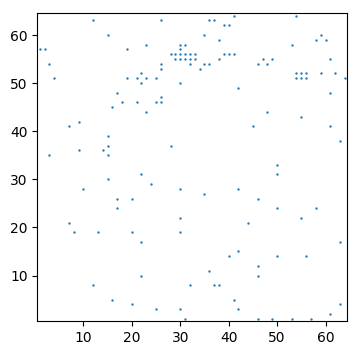

PyObject <matplotlib.collections.PathCollection object at 0x7f7b80037358>

In [8]:
ff=figure(figsize=(4,4))
xlim(0.5,64.5)
ylim(0.5,64.5)

scatter(canales[:,3], canales[:,2], s=0.5)
#scatter(canales[:,2], canales[:,1], s=0.5)

In [17]:
yxref=[39,40]
# okey menso a barreconjunto le tienes que pasar solo las columnas con coordenadas!!!
orderchans=barreconjuntoyordena(canales[:,2:3], yxref);

alfamin = 0.015623728620476831


In [18]:
orderchans

139×3 Array{Int64,2}:
 39  15    1
 41   7    2
 42   9    3
 45  16    4
 44  23    5
 46  18    6
 51   4    7
 46  21    8
 48  17    9
 54   3   10
 46  25   11
 57   1   12
 57   2   13
  ⋮         
 19   8  128
 26  17  129
 21   7  130
 31  22  131
 28  10  132
 30  15  133
 37  28  134
 35  15  135
 36  14  136
 35   3  137
 36   9  138
 37  15  139

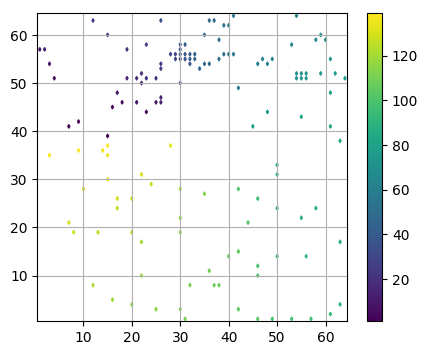

In [20]:
ff=figure(figsize=(5,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
#scatter(canales[:,2], canales[:,1], s=0.5)
scatter(orderchans[:,2], orderchans[:,1], marker="d",s=3, cmap="viridis", c=orderchans[:,3])
colorbar()
grid()

In [21]:
function freediaconis(datos)
    # Freedman and Diaconis
    n=length(datos)
    m=iqr(datos)
    result=2*m/cbrt(n)
    return result
end
    
function sacaentropia(datos::Array)
    binsize=freediaconis(datos)
    (vmin,vmax)=extrema(datos)
    normalizador=size(datos,1)
    if(binsize != 0 )
        rango=vmin:binsize:vmax
        histodo=fit(Histogram,datos,rango)
        pdf=histodo.weights./normalizador
        result=entropy(pdf)
    else
        result=0
    end
    return result
end

sacaentropia (generic function with 1 method)

In [32]:
function f(x...)
    ll=length(x)
    for j in 1:ll
        println(j, " ", x[j])
    end
end

f (generic function with 1 method)

In [33]:
f([2,3,4], 23, "mu")

1 [2, 3, 4]
2 23
3 mu


In [50]:
xxxx=Array{Real}(1,2)
#push!(x, (3.0,2.0))

MethodError: MethodError: no method matching Array{Real,N} where N(::Int64, ::Int64)
Closest candidates are:
  Array{Real,N} where N(!Matched::UndefInitializer, ::Int64) where T at boot.jl:418
  Array{Real,N} where N(!Matched::UndefInitializer, ::Int64, !Matched::Int64) where T at boot.jl:419
  Array{Real,N} where N(!Matched::UndefInitializer, ::Int64, !Matched::Int64, !Matched::Int64) where T at boot.jl:420
  ...

In [42]:
?push!

search: push! pushfirst! pushdisplay



```
push!(collection, items...) -> collection
```

Insert one or more `items` at the end of `collection`.

# Examples

```jldoctest
julia> push!([1, 2, 3], 4, 5, 6)
6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
```

Use [`append!`](@ref) to add all the elements of another collection to `collection`. The result of the preceding example is equivalent to `append!([1, 2, 3], [4, 5, 6])`.

---

```
push!(q::Deque{T}, x)
```

Add an element to the back

---

```
push!(sc, k=>v)
```

Argument `sc` is a SortedDict or SortedMultiDict and `k=>v` is a key-value pair. This inserts the key-value pair into the container. If the key is already present, this overwrites the old value. The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(sc, k=>v)
```

Argument `sc` is a SortedDict or SortedMultiDict and `k=>v` is a key-value pair. This inserts the key-value pair into the container. If the key is already present, this overwrites the old value. The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(sc, k)
```

Argument `sc` is a SortedSet and `k` is a key. This inserts the key into the container. If the key is already present, this overwrites the old value. (This is not necessarily a no-op; see below for remarks about the customizing the sort order.) The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(cb::CircularBuffer, data)
```

Add an element to the back and overwrite front if full.


In [56]:
typeof(8:0.33:20)

StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}

In [104]:
function histofreediaconis(arreglos::Array...)
    ll=length(arreglos)
    binsizes=zeros(Real,ll)
    rangos=Array{StepRangeLen}(undef, ll)     
       
    for j in 1:ll
        binsizes[j]=freediaconis(arreglos[j])
    end
    
    if any(x->x==0, binsizes)
        error(" una de tus cajas mide cero, algo esta mal")
    else
        for j in 1:ll
            (vi, vf)=extrema(arreglos[j])
            rangos[j]=vi:binsizes[j]:vf
        end
    end
    histodo=fit(Histogram, arreglos, (rangos...,))
    return histodo
    #return rangos
end    
        

histofreediaconis (generic function with 1 method)

In [106]:
xx=rand(100)
yy=rand(100)
zz=rand(100);
rrr=histofreediaconis(xx,yy,zz)
#baba=(xx, yy)

#fit(Histogram, baba, (rrr...,))

Histogram{Int64,3,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  0.012865130898679134:0.20641863132226354:0.8385396561877333
  0.010214708830716734:0.2273166148603985:0.9194811682723107
  0.0025314472732096416:0.21966709727289835:0.881199836364803
weights: [1 0 1 1; 1 1 1 2; 0 1 0 3; 2 0 1 0]

[1 0 2 1; 2 1 0 2; 1 0 2 0; 1 0 1 2]

[1 0 0 0; 2 0 1 3; 1 1 1 0; 3 0 2 2]

[0 3 0 1; 0 2 1 2; 0 0 1 0; 3 1 1 5]
closed: left
isdensity: false

In [98]:
f(x...)=typeof(x)

f (generic function with 1 method)

In [100]:
f([1])

Tuple{Array{Int64,1}}

In [87]:
h = fit(Histogram, [20], 0:20:100)

Histogram{Int64,1,Tuple{StepRange{Int64,Int64}}}
edges:
  0:20:100
weights: [0, 1, 0, 0, 0]
closed: left
isdensity: false

In [22]:
function sacaentropia(datosX::Array, datosY::Array)
    # ambos arrays deben ser igual de largos ???
    binsizeX=freediaconis(datosX)
    binsizeY=freediaconis(datosY)
    if (binsizeX==0 || binsizeY==0)
        error(" ¡Esto que, no tiene variacion en los datos!")
    else
        (viX,vfX)=extrema(datosX)
        (viY,vfY)=extrema(datosY)
        rangoX=viX:binsizeX:vfX
        rangoY=viY:binsizeY:vfY
        
        histodo=fit(Histogram, (datosX, datosY), (rangoX, rangoY))
        
        pdf=histodo.weights
        pdf=pdf./sum(pdf)
        result=entropy(pdf)
        return result
        #return (result, histodo)
    end

end

sacaentropia (generic function with 2 methods)

In [16]:
function infomutua(datosX::Array, datosY::Array)
    hetaX=sacaentropia(datosX)
    hetaY=sacaentropia(datosY)
    hetaXY=sacaentropia(datosX,datosY)
    result=hetaX+hetaY-hetaXY
    return result
end

infomutua (generic function with 1 method)

In [21]:
nchan=size(orderchans, 1)
hetas=zeros(nchan)
for j=1:nchan
    reng,col=orderchans[j,1],orderchans[j,2]
    ejemplo=lfp[reng,col,:]
    hetas[j]=sacaentropia(vec(ejemplo))
end

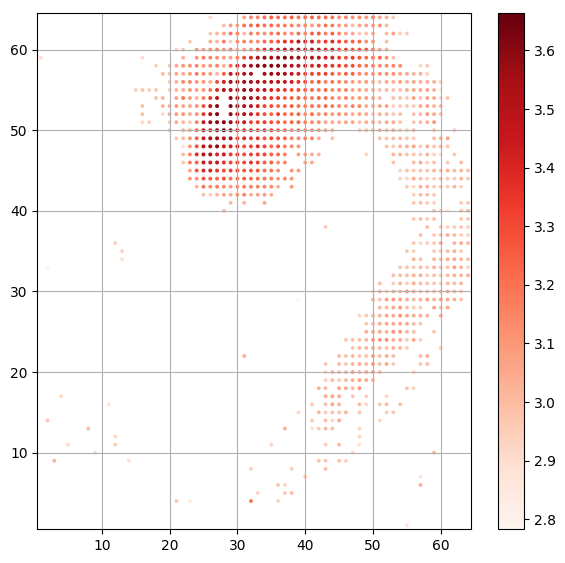

In [37]:
ff=figure(figsize=(7,6.7))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(orderchans[:,2], orderchans[:,1], s=hetas, c=hetas, cmap="Reds")
colorbar()
grid()

In [78]:
hetacut=quantile(hetas, 0.90)
tuabueta=findall(x->x>hetacut,hetas);
auxchans=hcat(orderchans[tuabueta,:], hetas[tuabueta])
naux=size(auxchans,1)

105

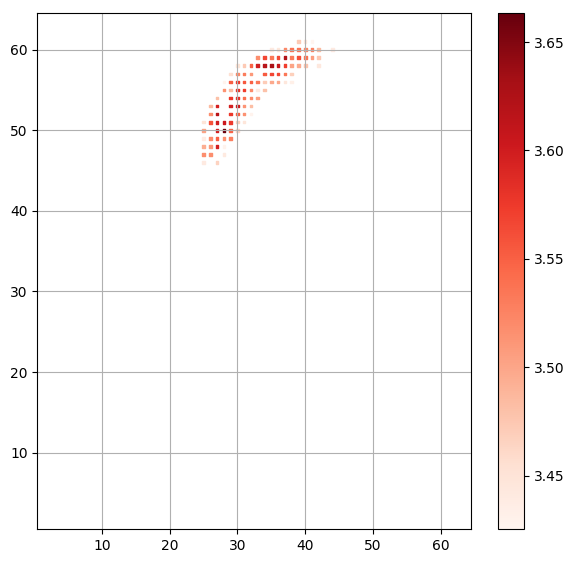

In [80]:
ff=figure(figsize=(7,6.7))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(auxchans[:,2], auxchans[:,1], s=auxchans[:,4], 
    c=auxchans[:,4],marker="s", cmap="Reds")
colorbar()
grid()

In [81]:
imutres=zeros(nchan)
refe=[50,28]
fijo=lfp[refe[1], refe[2],:]
for j=1:nchan
    reng,col=orderchans[j,1],orderchans[j,2]
    ejemplo=lfp[reng,col,:]
    imutres[j]=infomutua(fijo, ejemplo)
end

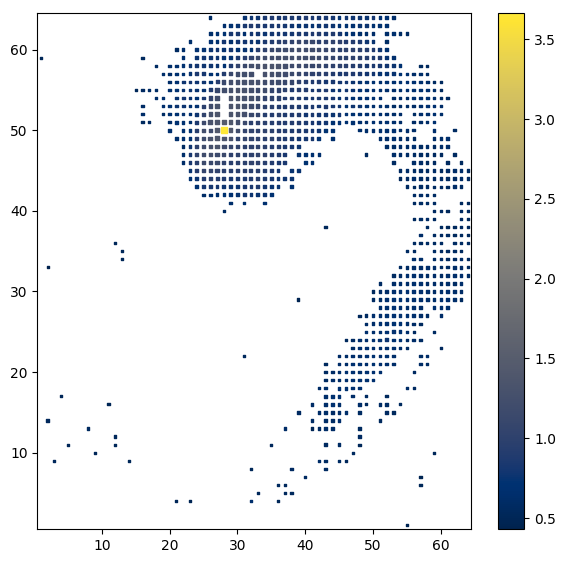

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff99d545518>

In [82]:
ff=figure(figsize=(7,6.7))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(orderchans[:,2], orderchans[:,1], s=imutres.*5, c=imutres, cmap="cividis", marker="s")
colorbar()
#grid()

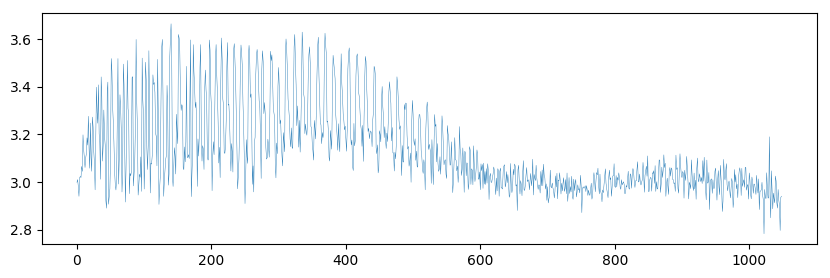

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff99e395ac8>

In [83]:
figure(figsize=(10,3))
plot(hetas, lw=0.3)

In [92]:
mutinfo=zeros(naux,naux);
crossentro=zeros(naux,naux)

for j=1:naux
    for k=j:naux
        
        reng1,col1=(auxchans[j,1], auxchans[j,2])
        reng2,col2=(auxchans[k,1], auxchans[k,2])
        
        reng1=round(Int32, reng1)
        reng2=round(Int32, reng2)
        
        col1=round(Int32, col1)
        col2=round(Int32, col2)
        
        
        
        dat1=lfp[reng1, col1,:]
        dat2=lfp[reng2, col2,:]
        
        mutinfo[j,k]=infomutua(dat1,dat2)
        mutinfo[k,j]=mutinfo[j,k]
    
    end
end

In [85]:
for j=1:naux
    mutinfo[j,j]=0
end

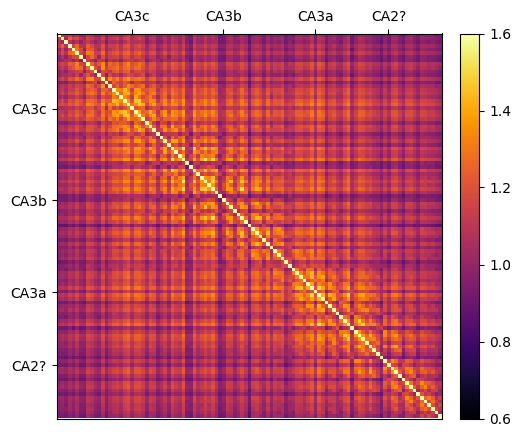

PyObject <matplotlib.colorbar.Colorbar object at 0x7ff99d0a95f8>

In [94]:
figure(figsize=(6,5))

imshow(mutinfo, cmap="inferno", interpolation="nearest", vmin=0.6, vmax=1.6)

#onde=[55, 125, 200, 250]
onde=[20, 45, 70, 90]
que=["CA3c","CA3b", "CA3a", "CA2?" ]
tick_params(bottom=false, top=true)
xticks(onde, que)
yticks(onde, que)
tick_params(bottom=false, top=true, labeltop=true, labelbottom=false)

colorbar(fraction=0.046, pad=0.04)

In [90]:
?crossentropy

search: crossentropy



```
crossentropy(p, q, [b])
```

Compute the cross entropy between `p` and `q`, optionally specifying a real number `b` such that the result is scaled by `1/log(b)`.
